In [18]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Import dataset

In [28]:
import requests
import pandas as pd

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

# Fetch data from the URL using requests
response = requests.get(URL)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Read the content into a DataFrame using pandas
    boston_df = pd.read_csv(io.BytesIO(response.content))
    # Now you have the DataFrame ready to use
    #print(boston_df.head())
else:
    
    print('Request failed with status code:', response.status_code)
    
display(boston_df)



,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05


# For the "Median value of owner-occupied homes" provide a boxplot

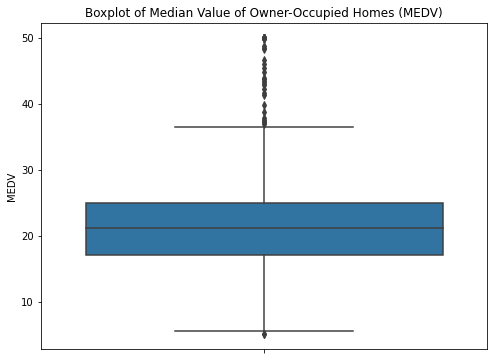

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('MEDV')
plt.show()
boston_df['MEDV'].describe()

Boxplot shows that the median value of owner-occupied homes ranges between ~9.2 and 50, with a mean of ~22.53

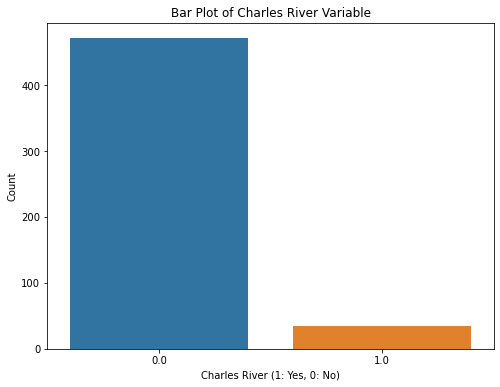

In [36]:
# Bar plot for Charles river variable
plt.figure(figsize=(8, 6))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()b

Bar plot shows that the number of houses bounded by the river is lower than the rest of the samples. 

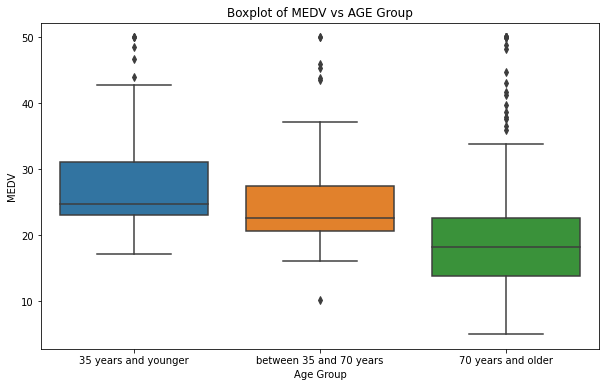

In [38]:
# Discretize the AGE variable into three groups
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, max(boston_df['AGE'])], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

# Boxplot for MEDV vs AGE_group
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs AGE Group')
plt.xlabel('Age Group')
plt.ylabel('MEDV')
plt.show()

Boxplots show the average median values for owner-occupied homes in $1000's is decreasing with age. 

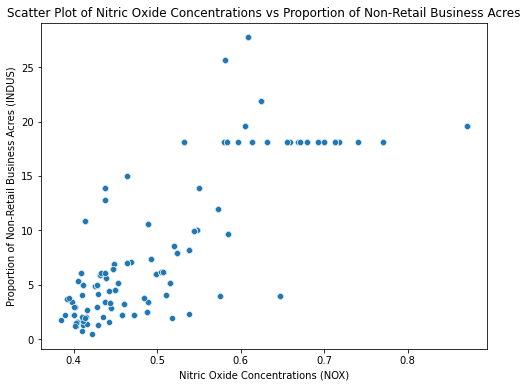

In [22]:

# Scatter plot for Nitric oxide concentrations vs proportion of non-retail business acres per town (NOX vs INDUS)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations (NOX)')
plt.ylabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.show()


The scatter plot does not provide a clear visive relationship between the two variables

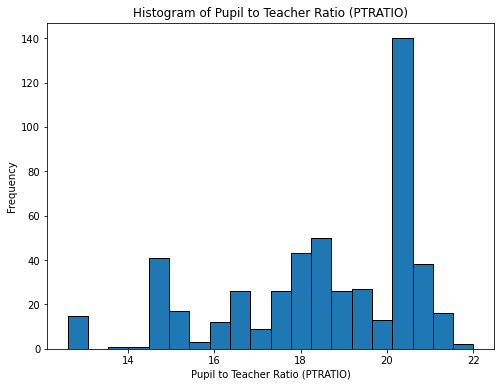

In [23]:

# Histogram for pupil to teacher ratio variable (PTRATIO)
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=20, edgecolor='black')
plt.title('Histogram of Pupil to Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil to Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
The PTRATIO histogram shows an apparent left-skewed disitrubtion

In [32]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? 
#(T-test for independent samples)

from scipy.stats import ttest_ind

charles_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
no_charles_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = ttest_ind(charles_river, no_charles_river)

print('T-statistic:', t_stat)
print('P-value:', p_value)


T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05


The p-value is less than 0.05, we reject the null hypothesis.

In [25]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?
#(ANOVA)

from scipy.stats import f_oneway

age_groups = boston_df.groupby('AGE_group')['MEDV'].apply(list)

f_stat, p_value = f_oneway(*age_groups)

print('F-statistic:', f_stat)
print('P-value:', p_value)

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15


The p-value is less than 0.05, we reject the null hypothesis.

In [26]:
#Can we conclude that there is no relationship between Nitric oxide concentrations 
#and proportion of non-retail business acres per town? (Pearson Correlation)

from scipy.stats import pearsonr

correlation, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print('Correlation coefficient:', correlation)
print('P-value:', p_value)

Correlation coefficient: 0.7636514469209149
P-value: 7.913361061240043e-98


If the p-value is greater than 0.05, we fail to reject the null hypothesis. Otherwise, we reject the null hypothesis.

In [40]:
#What is the impact of an additional weighted distance  
#to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

import statsmodels.api as sm

X = sm.add_constant(boston_df['DIS'])  # Add a constant term for the intercept
y = boston_df['MEDV']

model = sm.OLS(y, X).fit()
summary = model.summary()
# Extract p-value for the coefficient of DIS
p_value_dis = model.pvalues['DIS']
print(summary)
print(p_value_dis)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 03 May 2024   Prob (F-statistic):           1.21e-08
Time:                        20:16:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

The p-value is less than 0.05, we reject the null hypothesis, indicating that there is a significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes. 